In [67]:
import pandas as pd
import numpy as np
# Plot the data first index
import matplotlib.pyplot as plt 

In [68]:

# Plot the data as image
gt_array = np.load("data/2810/gt.npy")

### Get the GT array.

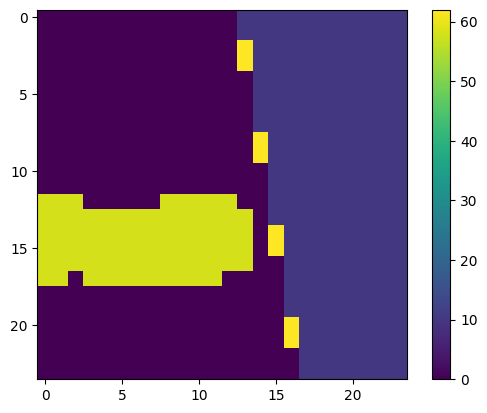

In [69]:
# Show the array image
plt.imshow(gt_array)
plt.colorbar()

In [70]:
# Get the unique numbers in the array
unique = np.unique(gt_array)
unique

array([ 0, 10, 58, 62], dtype=int16)

### Load Data and calculate the VIs.

In [71]:
# Load the data from the .npy array
data = np.load("data/2810/data.npy")

In [72]:
def calculate_ndvi(data_array):
    """
    Calculate NDVI from a given .npy array with Sentinel-2 bands.

    Parameters:
    - data_array: numpy array of shape (T, H, W, C), where
                  T = Time steps, H = Height, W = Width, C = Bands (9 Sentinel bands).

    Returns:
    - ndvi_array: numpy array of shape (T, H, W) with NDVI values.
    """

    # Extract NIR (Band 8) and RED (Band 4) from the 9-band array
    nir = data_array[..., 0].astype(np.float32)  # NIR band
    red = data_array[..., 3].astype(np.float32)  # RED band

    # Calculate NDVI using the formula (NIR - RED) / (NIR + RED)
    ndvi = (nir - red) / (nir + red + 1e-10)  # Adding epsilon to avoid division by zero

    return ndvi

def mask_ndvi(ndvi, gt_array, mask_value=10):
    """
    Masks NDVI values where gt_array has the specified mask_value.

    Parameters:
    - ndvi: 3D NumPy array of shape (T, H, W), the NDVI values.
    - gt_array: 2D NumPy array of shape (H, W), the mask values.
    - mask_value: The value in gt_array to use for masking (default is 10).

    Returns:
    - masked_ndvi: 3D NumPy array of shape (T, H, W) with masked NDVI values.
    """
    gt_array = np.resize(gt_array, (24, 24))  # Make sure this matches (H, W) dimensions
    # Ensure the gt_array is broadcasted to match the NDVI shape
    mask = (gt_array == mask_value)[np.newaxis, :, :]  # Shape: (1, H, W)
    mask = np.repeat(mask, ndvi.shape[0], axis=0)  # Repeat along the time axis (T)

    # Ensure the mask shape matches NDVI shape exactly
    mask = mask.astype(bool)  # Ensure mask is boolean

    # Apply the mask: Set NDVI to NaN where the mask is True
    masked_ndvi = np.where(mask, np.nan, ndvi)

    return masked_ndvi

ndvi = calculate_ndvi(data)
masked_ndvi = mask_ndvi(ndvi, gt_array)

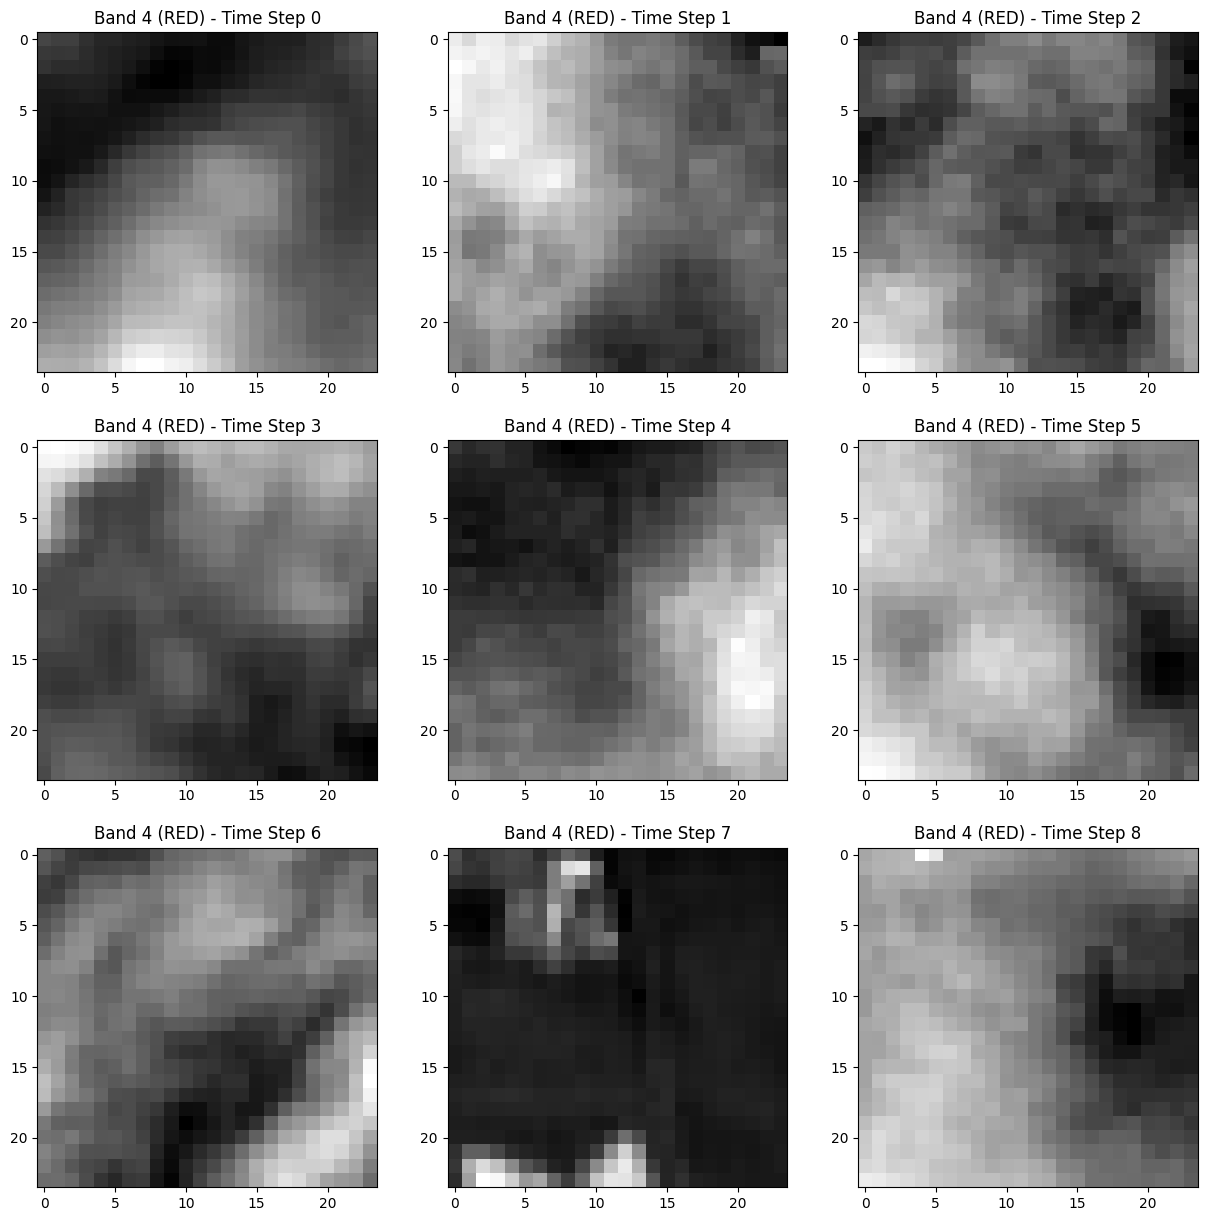

In [66]:
# Get the masked NDVI values using np.nanmean, and plot the result
mean_ndvi = np.nanmean(masked_ndvi, axis=(1, 2))

scaled_data = data / 10000.0  # Scale the data to [0, 1] range

# Plot the band values for all time steps to vizualize the behaviour
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    band = scaled_data[i, ..., 3]  # Select the RED band
    ax.imshow(band, cmap='gray')
    ax.set_title(f"Band 4 (RED) - Time Step {i}")

In [63]:
# Scale by multipltiying by 0.0001



array([[[[ 3196,  2942,  3172, ...,    48,    27,    33],
         [ 3140,  2916,  3124, ...,    48,    27,    33],
         [ 3134,  2854,  3088, ...,    46,    26,    32],
         ...,
         [ 3230,  2800,  3016, ...,    49,    33,    37],
         [ 3282,  2972,  3132, ...,    53,    37,    41],
         [ 3444,  3160,  3276, ...,    53,    37,    41]],

        [[ 3060,  2854,  3042, ...,    48,    27,    33],
         [ 3016,  2814,  2946, ...,    48,    27,    33],
         [ 3030,  2730,  2874, ...,    46,    26,    32],
         ...,
         [ 3206,  2830,  2974, ...,    49,    33,    37],
         [ 3230,  2912,  3042, ...,    53,    37,    41],
         [ 3312,  3064,  3184, ...,    53,    37,    41]],

        [[ 2918,  2666,  2792, ...,    44,    24,    30],
         [ 2876,  2608,  2744, ...,    44,    24,    30],
         [ 2932,  2624,  2752, ...,    43,    24,    29],
         ...,
         [ 3120,  2752,  2898, ...,    48,    32,    35],
         [ 3152,  2846,  2

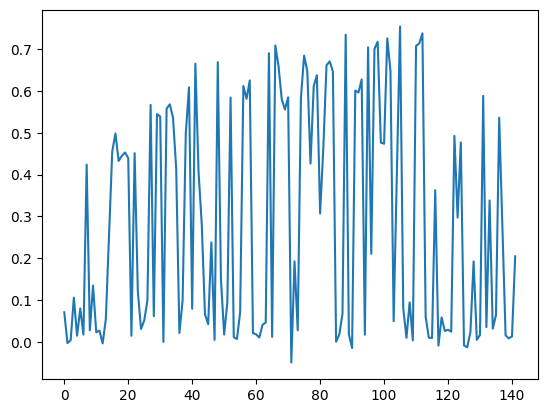

In [73]:
# Plot the mean NDVI values
plt.plot(mean_ndvi)